In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('/Users/haoli/Downloads/imdb/train.csv')
test = pd.read_csv('/Users/haoli/Downloads/imdb/test.csv')

In [3]:
train.head()

,text,sentiment
0,For a movie that gets no respect there sure ar...,pos
1,Bizarre horror movie filled with famous faces ...,pos
2,"A solid, if unremarkable film. Matthau, as Ein...",pos
3,It's a strange feeling to sit alone in a theat...,pos
4,"You probably all already know this by now, but...",pos


In [4]:
test.head()

,text,sentiment
0,"Based on an actual story, John Boorman shows t...",pos
1,This is a gem. As a Film Four production - the...,pos
2,"I really like this show. It has drama, romance...",pos
3,This is the best 3-D experience Disney has at ...,pos
4,"Of the Korean movies I've seen, only three had...",pos


In [5]:
train.shape

(25000, 2)

In [6]:
test.shape

(25000, 2)

In [7]:
train.sentiment.value_counts()

pos    12500
neg    12500
Name: sentiment, dtype: int64

In [8]:
test.sentiment.value_counts()

pos    12500
neg    12500
Name: sentiment, dtype: int64

## 1.The naive Bayesian model

### Encoding using Tfidf

In [9]:
import nltk
import string

In [10]:
#We need to transform a sentence (or an article) into a vector first. A naive way of doing this is the following:
#Count all the different words showing up in all of the texts, call this collection vocabulary. Then each article
#is transform into a vector of length the length of the vocabulary by the rule: If it has a certain word, that 
#position is the number of times that word appears in the article, otherwise it is 0. In this way we get a very 
#sparse vector for each article. Of course the order of the words is lost in this kind of encoding.

In [ ]:
#First, tokenization: Removing the punctuation symbols and other weird things from the article, and break the 
#resulting article into a vector of words.

In [11]:
#We need to replace the punctuations by ' '.
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
#Make the above string into a string consists of ' ' of equal length.
transtbl = str.maketrans(string.punctuation, ' '*len(string.punctuation))

In [15]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [16]:
#Stop words show up frequently, we don't want to take them into account.
stopwords = nltk.corpus.stopwords.words('english')

In [17]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
lemmatizer = nltk.WordNetLemmatizer()

In [28]:
def preprocessing(s):
#The symbol '<br />' also appears in the articles, first remove them.
    s = s.replace('<br />', '')
    
#Next, replace punctuations by ' '
    s = s.translate(transtbl)
    
#lemmatize(..., 'v') changes the verb like 'loved' into 'love'.
#The stopwords are removed.
    tokens = [lemmatizer.lemmatize(t.lower(),'v') 
              for t in nltk.word_tokenize(s) 
              if t.lower() not in stopwords]
    
    return ' '.join(tokens)

In [19]:
' '.join('abc')

'a b c'

In [20]:
#So the above function returns a string separated by ' '.

In [21]:
#import a progress bar to show the progress.
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

/Users/haoli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  """Entry point for launching an IPython kernel.
/Users/haoli/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [29]:
for df in train, test:
    df['text_prep'] = df['text'].progress_apply(preprocessing)

In [33]:
#All the words appeared in the training articles with repetitions.
all_words = [word for text in tqdm_notebook(train['text_prep']) for word in text.split()]

In [34]:
all_words[:10]

['movie',
 'get',
 'respect',
 'sure',
 'lot',
 'memorable',
 'quote',
 'list',
 'gem',
 'imagine']

In [35]:
#FreqDist counts the frequency of each word in 
voca = nltk.FreqDist(all_words)
print(voca)

<FreqDist with 65081 samples and 3022531 outcomes>


In [36]:
voca

FreqDist({'film': 48170, 'movie': 43912, 'one': 26747, 'make': 23538, 'like': 22335, 'see': 20773, 'get': 18108, 'time': 16143, 'good': 15124, 'character': 14153, ...})

In [37]:
voca.most_common(10)

[('film', 48170),
 ('movie', 43912),
 ('one', 26747),
 ('make', 23538),
 ('like', 22335),
 ('see', 20773),
 ('get', 18108),
 ('time', 16143),
 ('good', 15124),
 ('character', 14153)]

In [38]:
#If we use all the words appeared, the vectors are going to be too long and sparse. Here use the top 3000 words as
#the vocabulary.
topwords = [word for word in voca.most_common(3000)]

In [39]:
topwords[:5]

['film', 'movie', 'one', 'make', 'like']

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

In [41]:
transformer = TfidfTransformer() #The default value of smooth_idf is False

In [43]:
#We use topwords to construct the vectorizer. Otherwise the vectorizer would use the context we are going fit it.
tfidf_vec = TfidfVectorizer(vocabulary = topwords)

In [44]:
train_x, train_y = train['text_prep'], train['sentiment']
test_x, test_y = test['text_prep'], test['sentiment']

In [46]:
train_features = tfidf_vec.fit_transform(train_x)
test_features = tfidf_vec.transform(test_x)

In [47]:
#Import the multinomial naive Bayesian model.
from sklearn.naive_bayes import MultinomialNB

In [50]:
from sklearn import metrics

In [48]:
mnb = MultinomialNB()

In [49]:
#We fit the MNB model on the training set. Notice that we don't have to encode the target. 
mnb.fit(train_features, train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
#Prediction on the test set.
pred = mnb.predict(test_features)

In [52]:
print(metrics.classification_report(test_y, pred))

              precision    recall  f1-score   support

         neg       0.84      0.85      0.84     12500
         pos       0.85      0.83      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



## 2.The DNN model

In [ ]:
#In this section we do a practice using dnn model on the previous dataset.

In [53]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [54]:
#The simple dnn model
def build_nn_model(input_dim, layers, output_dim):
    # Input layer
    X = Input(shape=(input_dim,))
    
    # Hidden layer(s)
    H = X
    for layer in layers:
        H = Dense(layer, activation='relu')(H)
        H = Dropout(0.5)(H)
    
    # Output layer
    activation_func = 'softmax'
    
    Y = Dense(output_dim, activation=activation_func)(H)
    return Model(inputs=X, outputs=Y)

In [55]:
#Unlike MNB, for dnn model we need to have a numerical target. We have to (onehot) encode 'sentiment'. 

In [56]:
train_y_num = train_y.apply(lambda x: 1 if x == 'pos' else 0)

In [57]:
train_y_num.head()

0    1
1    1
2    1
3    1
4    1
Name: sentiment, dtype: int64

In [58]:
test_y_num = test_y.apply(lambda x: 1 if x == 'pos' else 0)

In [59]:
#We want to turn 1 and 0 to [1,0] and [0,1].
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [64]:
train_y_oh = convert_to_one_hot(np.array(train_y_num), 2)
test_y_oh = convert_to_one_hot(np.array(test_y_num), 2)

In [65]:
train_y_oh

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [66]:
train_features.shape

(25000, 3000)

In [70]:
train_features = train_features.toarray()
test_features = test_features.toarray()

In [77]:
#Now we build up the simple dnn model.
dnn_model = build_nn_model(input_dim = 3000, layers = [1000, 300, 100, 30, 10], output_dim = 2)

In [78]:
dnn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [79]:
imbd_history = dnn_model.fit(
    train_features, 
    train_y_oh, 
    epochs=10, 
    shuffle=True, 
    validation_data=(test_features, test_y_oh), )

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 13s 537us/sample - loss: 0.4964 - accuracy: 0.7442 - val_loss: 0.3102 - val_accuracy: 0.8665
Epoch 2/10
25000/25000 [==============================] - 13s 528us/sample - loss: 0.3434 - accuracy: 0.8742 - val_loss: 0.3196 - val_accuracy: 0.8684
Epoch 3/10
25000/25000 [==============================] - 13s 525us/sample - loss: 0.2704 - accuracy: 0.9038 - val_loss: 0.3564 - val_accuracy: 0.8662
Epoch 4/10
25000/25000 [==============================] - 14s 540us/sample - loss: 0.2094 - accuracy: 0.9288 - val_loss: 0.3736 - val_accuracy: 0.8630
Epoch 5/10
25000/25000 [==============================] - 14s 548us/sample - loss: 0.1315 - accuracy: 0.9594 - val_loss: 0.5613 - val_accuracy: 0.8644
Epoch 6/10
25000/25000 [==============================] - 14s 553us/sample - loss: 0.0821 - accuracy: 0.9749 - val_loss: 0.8219 - val_accuracy: 0.8643
Epoch 7/10
25000/25000 [====================

In [74]:
import matplotlib.pyplot as plt

In [75]:
def plot_history(his, metrics):
    for metric in metrics:
        plt.plot(his.history[metric], label=metric)
    plt.legend()

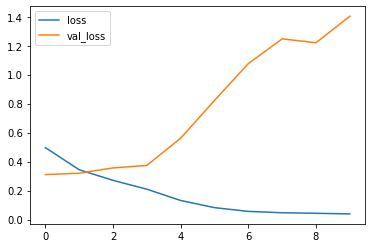

In [80]:
plot_history(imbd_history, ['loss', 'val_loss'])

In [81]:
#It starts overlfitting the training set after the first epoch. And the largest validation accuracy appears at
#the second epoch.

## 3.The MLP Model

In [82]:
#The model is similar to the dnn model as above. The difference is that we add dropout layers. 
def build_mlp_model(input_dim, layers, output_dim, dropout_rate=0.2):
    # Input layer
    X = Input(shape=(input_dim,))
    
    # Hidden layer(s)
    H = X
    for layer in layers:
        H = Dense(layer, activation='relu')(H)
        H = Dropout(rate=dropout_rate)(H) #Adding a dropout layer after each dense layer.
    
    # Output layer
    activation_func = 'softmax'
    
    Y = Dense(output_dim, activation=activation_func)(H)
    return Model(inputs=X, outputs=Y)

In [92]:
mlp_model = build_mlp_model(input_dim = 3000,
                           layers = [600, 120, 24],
                           output_dim = 2,
                           dropout_rate = 0.5)

In [93]:
mlp_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 3000)]            0         
_________________________________________________________________
dense_15 (Dense)             (None, 600)               1800600   
_________________________________________________________________
dropout_11 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 120)               72120     
_________________________________________________________________
dropout_12 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 24)                2904      
_________________________________________________________________
dropout_13 (Dropout)         (None, 24)                0   

In [94]:
mlp_model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

In [95]:
imbd_history = mlp_model.fit(
    train_features, 
    train_y_oh, 
    epochs=5, 
    shuffle=True, 
    validation_data=(test_features, test_y_oh), )

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 7s 274us/sample - loss: 0.3823 - accuracy: 0.8348 - val_loss: 0.2973 - val_accuracy: 0.8744
Epoch 2/5
25000/25000 [==============================] - 7s 267us/sample - loss: 0.2618 - accuracy: 0.8984 - val_loss: 0.3130 - val_accuracy: 0.8688
Epoch 3/5
25000/25000 [==============================] - 7s 269us/sample - loss: 0.2054 - accuracy: 0.9250 - val_loss: 0.3507 - val_accuracy: 0.8665
Epoch 4/5
25000/25000 [==============================] - 6s 256us/sample - loss: 0.1188 - accuracy: 0.9607 - val_loss: 0.4334 - val_accuracy: 0.8620
Epoch 5/5
25000/25000 [==============================] - 6s 259us/sample - loss: 0.0627 - accuracy: 0.9798 - val_loss: 0.5610 - val_accuracy: 0.8614


In [96]:
#It helps a little bit, but the overfitting problem is still there.

### Adding hyperparameters to the model

In [139]:
#Adjustable hyperparameters.
hyper_params = {
    'learning_rate': 1e-3,  # default for Adam
    'epochs': 1000,
    'batch_size': 64,
    'layers': [64, 32],
    'dim': 20000,
    'dropout_rate': 0.5,
}

In [143]:
mlp_model = build_mlp_model(
    input_dim=hyper_params['dim'],
    layers=hyper_params['layers'],
    output_dim=2,
    dropout_rate=hyper_params['dropout_rate'],
)

mlp_model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 20000)]           0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                1280064   
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_21 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 66        
Total params: 1,282,210
Trainable params: 1,282,210
Non-trainable params: 0
_________________________________________________

### Using SelectKBest

In [101]:
from sklearn.feature_selection import SelectKBest

In [113]:
selector = SelectKBest(k = 20000)

In [114]:
#Now use tfidfvectorizer with default vocabulary, i.e. the words in the articles it fitted on.
tfidf_vectorizer = TfidfVectorizer(
    min_df=2, # ignore word that only appears in 1 document
    ngram_range=(1, 2), # consider both uni-gram and bi-gram
)

In [115]:
train_x_new = tfidf_vectorizer.fit_transform(train_x)

In [116]:
train_x_new.shape

(25000, 351389)

In [117]:
test_x_new = tfidf_vectorizer.transform(test_x)

In [120]:
selector.fit(train_x_new, train_y_num)

SelectKBest(k=20000, score_func=<function f_classif at 0x11ec297a0>)

In [122]:
train_x_20000 = selector.transform(train_x_new)
test_x_20000 = selector.transform(test_x_new)

In [123]:
train_x_20000.shape

(25000, 20000)

In [124]:
train_x_20000.shape

(25000, 20000)

In [129]:
train_x_20000

<25000x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 1845253 stored elements in Compressed Sparse Row format>

### Callbacks

In [130]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [131]:
early_stoppping_hook = EarlyStopping(
    monitor='val_loss',  # what metrics to track
    patience=2,  # maximum number of epochs allowed without imporvement on monitored metrics 
)

CPK_PATH = 'model_cpk.hdf5'    # path to store checkpoint

model_cpk_hook = ModelCheckpoint(
    CPK_PATH,
    monitor='val_loss', 
    save_best_only=True,  # Only keep the best model
)

### Compile the model and modeling

In [144]:
mlp_model.compile(loss = 'categorical_crossentropy', 
                  optimizer=Adam(lr=hyper_params['learning_rate']), 
                  metrics = ['accuracy'])

In [145]:
mlp_history = mlp_model.fit(train_x_20000.toarray(), 
                            train_y_oh, epochs = 5, 
                            validation_data = [test_x_20000.toarray(), test_y_oh],
                            batch_size = hyper_params['batch_size'],
                            callbacks=[early_stoppping_hook, model_cpk_hook])

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 7s 298us/sample - loss: 0.3502 - accuracy: 0.8562 - val_loss: 0.2632 - val_accuracy: 0.8922
Epoch 2/5
25000/25000 [==============================] - 4s 175us/sample - loss: 0.1443 - accuracy: 0.9508 - val_loss: 0.3053 - val_accuracy: 0.8809
Epoch 3/5
25000/25000 [==============================] - 4s 149us/sample - loss: 0.0886 - accuracy: 0.9709 - val_loss: 0.3691 - val_accuracy: 0.8757


### Vectorizing with stopwords 

In [146]:
#Above we vectorize the text part of the datasets without stopwords. Here we use the stopwords.
train_x_stp = tfidf_vectorizer.fit_transform(train['text'])

In [147]:
test_x_stp = tfidf_vectorizer.transform(test['text'])

In [148]:
selector.fit(train_x_stp, train_y_num)

SelectKBest(k=20000, score_func=<function f_classif at 0x11ec297a0>)

In [149]:
train_x_stp = selector.transform(train_x_stp)
test_x_stp = selector.transform(test_x_stp)

In [150]:
train_x_stp.shape

(25000, 20000)

In [151]:
test_x_stp.shape

(25000, 20000)

In [ ]:
mlp_model = build_mlp_model(
    input_dim=hyper_params['dim'],
    layers=hyper_params['layers'],
    output_dim=2,
    dropout_rate=hyper_params['dropout_rate'],
)

mlp_model.summary()

In [153]:
mlp_model.compile(loss = 'categorical_crossentropy', 
                  optimizer=Adam(lr=hyper_params['learning_rate']), 
                  metrics = ['accuracy'])

In [154]:
mlp_history = mlp_model.fit(train_x_stp.toarray(), 
                            train_y_oh, epochs = 5, 
                            validation_data = [test_x_stp.toarray(), test_y_oh],
                            batch_size = hyper_params['batch_size'],
                            callbacks=[early_stoppping_hook, model_cpk_hook])

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 8s 301us/sample - loss: 0.3335 - accuracy: 0.8664 - val_loss: 0.2448 - val_accuracy: 0.9003
Epoch 2/5
25000/25000 [==============================] - 4s 161us/sample - loss: 0.1327 - accuracy: 0.9539 - val_loss: 0.2565 - val_accuracy: 0.9017
Epoch 3/5
25000/25000 [==============================] - 4s 148us/sample - loss: 0.0733 - accuracy: 0.9752 - val_loss: 0.3247 - val_accuracy: 0.8958


In [155]:
#We can see that for the same model, using stopwords we get a slightly better result.